<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("X_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 15s 0us/step
X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5) (x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 15s 4ms/step - loss: 1.5749 - accuracy: 0.4273 - val_loss: 1.3822 - val_accuracy: 0.4901
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2988 - accuracy: 0.5319 - val_loss: 1.1660 - val_accuracy: 0.5787
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1694 - accuracy: 0.5840 - val_loss: 1.0568 - val_accuracy: 0.6286
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0716 - accuracy: 0.6170 - val_loss: 0.9750 - val_accuracy: 0.6558
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9975 - accuracy: 0.6453 - val_loss: 0.9579 - val_accuracy: 0.6593
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9314 - accuracy: 0.6701 - val_loss: 0.9248 - val_accuracy: 0.6766
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8783 - accuracy: 0.6884 - val_loss: 0.8765 - val_accuracy

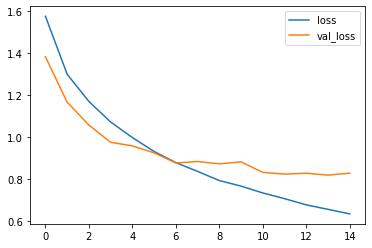

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

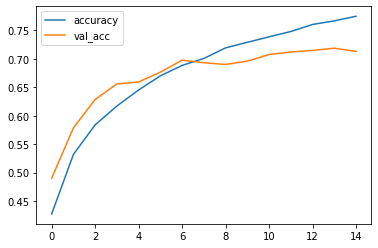

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[726  18  22  20  19   5  12  10 117  51]
 [ 13 824   5   8   4   1  10   1  42  92]
 [ 68   9 548  90 125  42  57  30  23   8]
 [ 23   5  51 597  82  96  59  48  18  21]
 [ 13   2  54  78 707  33  33  59  17   4]
 [ 17   1  40 270  61 522  24  47   7  11]
 [  8  14  34  88  44  11 780   4  11   6]
 [ 15   2  24  52  78  52   8 751   3  15]
 [ 30  19  10  12  13   4   4   3 879  26]
 [ 24  87   6  17   6   4   9   9  42 796]]


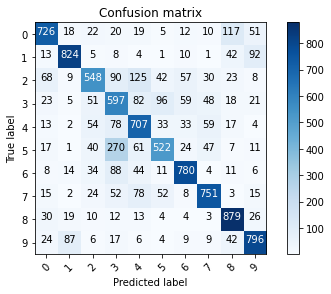

In [10]:
# Plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalized=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalized:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.ewaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalized else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

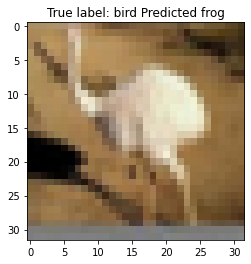

In [19]:
# show some misclassificatied examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (labels[y_test[i]], labels[p_test[i]]));